# Домашнее задание № 10

# Поиск выбросов и генерация новых признаков

In [19]:
# загрузим базовые библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

1. Получение данных

In [2]:
# подключаемся к Glass Classification
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/glass")

print("Path to dataset files:", path)

100%|██████████| 3.42k/3.42k [00:00<00:00, 5.83MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/glass/versions/1


In [3]:
# считываем данные
path = '/root/.cache/kagglehub/datasets/uciml/glass/versions/1/glass.csv'
df = pd.read_csv(path)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# посмотрим размер
df.shape

(214, 10)

Целевая переменная – тип стекла 'Type'. Остальные признаки описывают химические элементы в составе материала.

In [11]:
# целевая переменная
target = 'Type'
# посмотрим сколько у нас классов
df[target].unique()

array([1, 2, 3, 5, 6, 7])

2. Первичный анализ

In [10]:
# количество уникальных значений
df.nunique()

,0
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


In [22]:
# проверим на пропуски
df[df.isna().any(axis=1)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [24]:
# и вот так
df.isnull().values.any()

False

3. Разделим выборку на обучающую и тестовую

In [14]:
# разобъем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2, random_state=42
                                                    )

Обучим модель на RandomForestClassifier() на не обработанных данных

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

подберем лучшие параметры

In [78]:
n_samples = df.shape[0]
n_features = df.shape[1]

RFC_param_grid = {'n_estimators': [20,50,100],
                  'max_depth': [None, 2, 5,],
                  'min_samples_split': [2, 0.5, n_samples//2,],
                  'min_samples_leaf': [1, 0.5, n_samples//2,],
                  'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2],
                  'bootstrap':[True, False],
                 }

In [79]:
rf_classifier_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                                  param_grid=RFC_param_grid,
                                  n_jobs=-1,
                                  cv=3,
                                  verbose=1,
                                  refit=True    # для получения лучшей функции
                                 )
rf_classifier_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1134 candidates, totalling 3402 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 3402.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 2, 5],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 5],
                         'min_samples_leaf': [1, 0.5, 107],
                         'min_samples_split': [2, 0.5, 107],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [80]:
# посмотрим на оптимальные параметры
rf_classifier_grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [81]:
# Получим нашу лучшую модель
model_best_RFC = rf_classifier_grid.best_estimator_
model_best_RFC

RandomForestClassifier(max_features=0.3, n_estimators=50, random_state=42)

5. Получим предсказания и отчет о классификации

In [82]:
# получим предсказания
y_pred = model_best_RFC.predict(X_test)

In [83]:
# вычислим точность модели
model_best_RFC.score(X_test, y_test)

0.8372093023255814

In [84]:
# получим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.86      0.84      0.83        43



Ради интереса посмотрим, что нам добавит BaggingClassifier() на не обработанной выборке

In [85]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
n_samples = df.shape[0]
n_features = df.shape[1]

BC_param_grid = {
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 'n_estimators': [5, 10, 15],  # количество деревьев, которые будут использоваться в ансамбле.
                 'max_samples' : [0.6, 0.8, 1.0],
                 'max_features' : [0.6, 0.8, 1.0],
                 'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2]
                }

In [97]:
bc_classifier_grid = GridSearchCV(BaggingClassifier(estimator=RandomForestClassifier(random_state=42)),
                                  param_grid=BC_param_grid,
                                  n_jobs=-1,  # используем все доступные процессоры
                                              # по умолчанию None (1 задание)
                                  cv=5,       # количество разрезов кросс-валидации
                                              # по умолчанию cv=5
                                  refit=True  # для получения лучшей функции
                                 )
bc_classifier_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/va

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=RandomForestClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 5],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15]})

Даже для такого маленького датасета считаем ну очень долго

In [99]:
# посмотрим на оптимальные параметры
bc_classifier_grid.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 5,
 'max_samples': 1.0,
 'n_estimators': 10}

In [100]:
# Сохраним нашу лучшую модель
model_best_BC = bc_classifier_grid.best_estimator_
model_best_BC

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=RandomForestClassifier(random_state=42),
                  max_features=5)

In [101]:
# получаем предсказания
y_pred = model_best_BC.predict(X_test)

In [102]:
# вычислим точность модели
model_best_BC.score(X_test, y_test)

0.813953488372093

In [103]:
# получим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.91      0.71      0.80        14
           3       1.00      0.33      0.50         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.81        43
   macro avg       0.90      0.74      0.78        43
weighted avg       0.85      0.81      0.80        43



Точность намного хуже. Думаю это объясняется малым количеством исходных данных

6. Обработка выбросов

а) визуализация

Рассмотрим наши выбросы

In [27]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
# для удобства сохнаним все наши признаки и целевую переменную в отдельные переменные
RI = df['RI']
Na = df['Na']
Mg = df['Mg']
Al = df['Al']
Si = df['Si']
K = df['K']
Ca = df['Ca']
Ba = df['Ba']
Fe = df['Fe']
Type = df['Type']

In [16]:
tmp=pd.melt(df.drop(columns=target))
tmp

,variable,value
0,RI,1.52101
1,RI,1.51761
2,RI,1.51618
3,RI,1.51766
4,RI,1.51742
...,...,...
1921,Fe,0.00000
1922,Fe,0.00000
1923,Fe,0.00000
1924,Fe,0.00000


In [18]:
melted_df = pd.melt(df, id_vars=['target'])

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['target']"

In [ ]:
melted_df = pd.melt(df, id_vars=['Name'], var_name='Subject', value_name='Score')

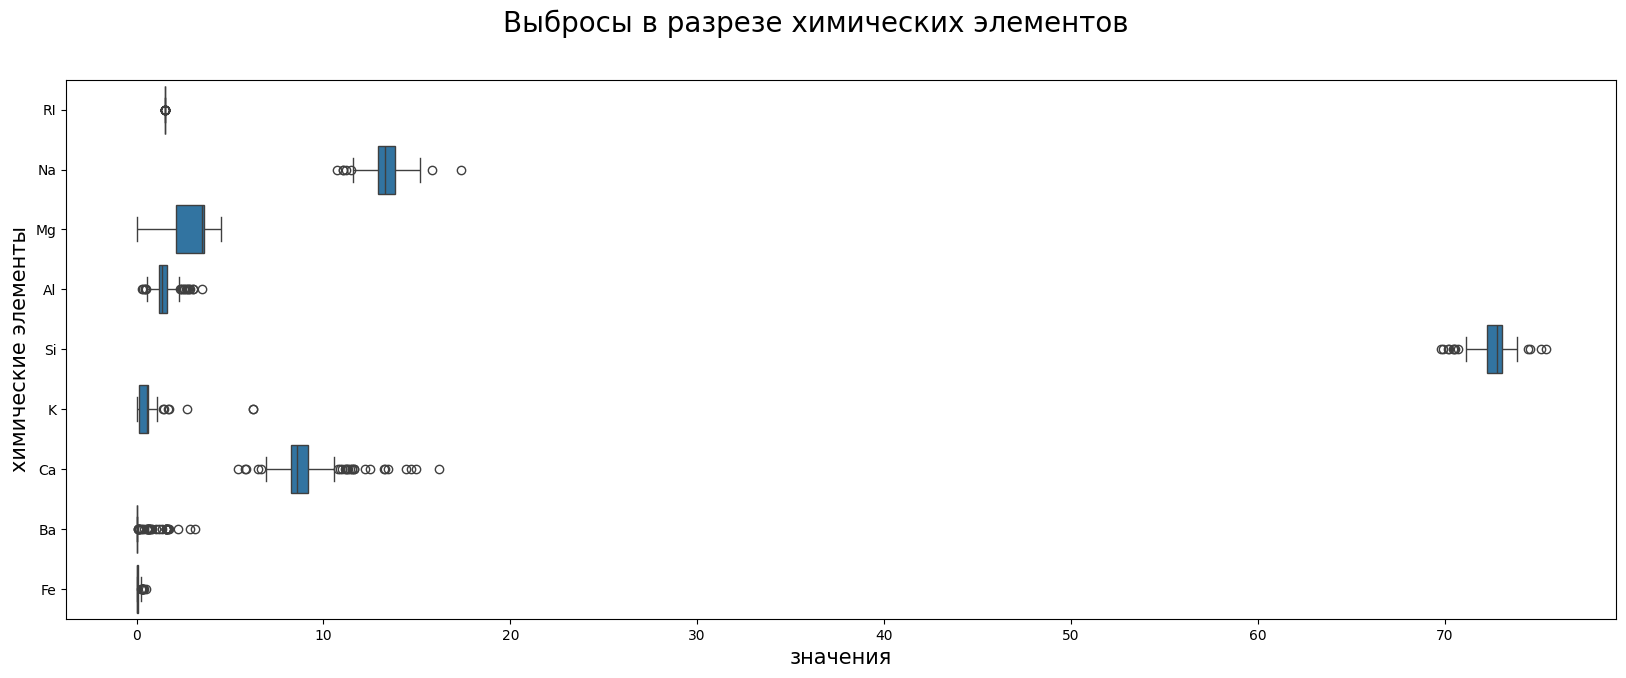

In [229]:
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов', fontsize=20)
plt.show()

Посмотрим в разрезе Type

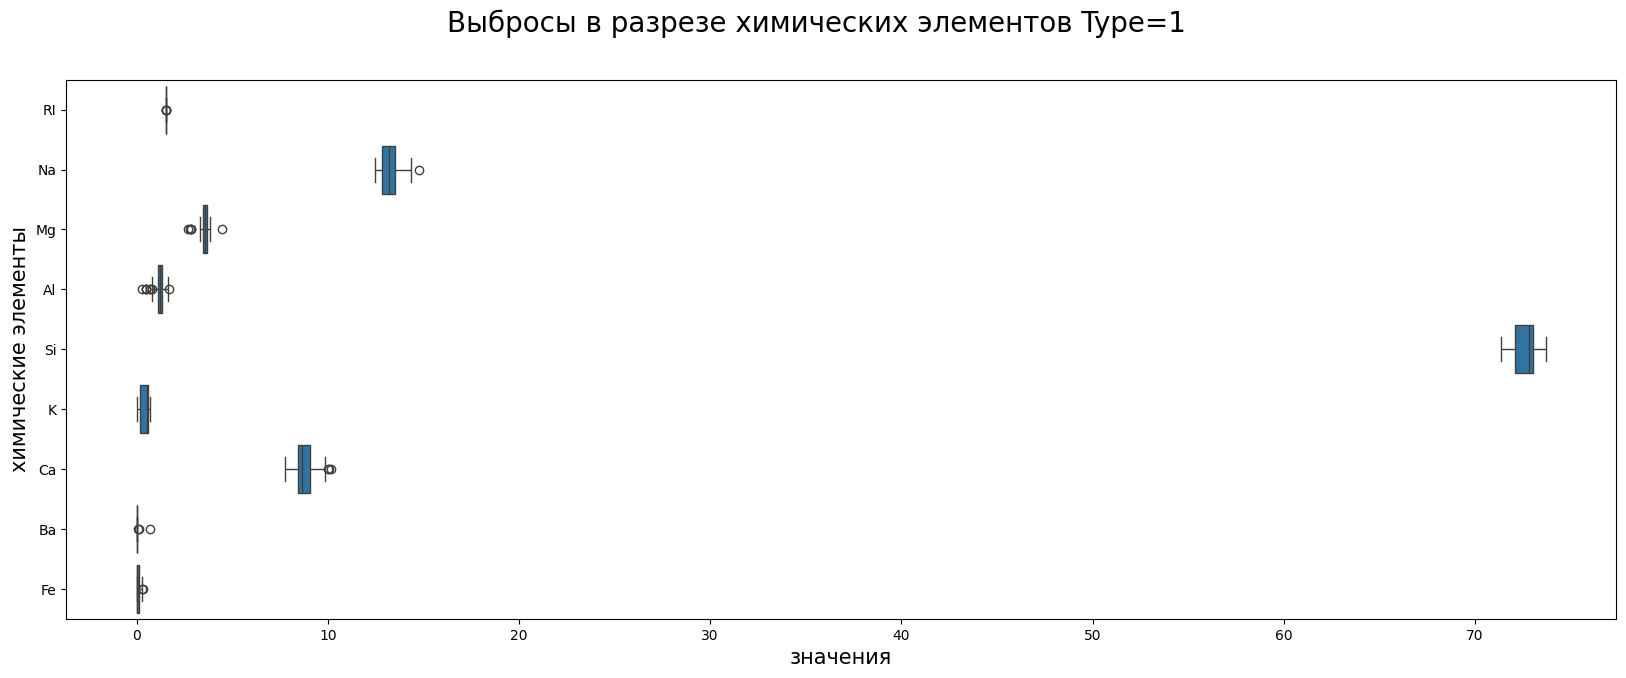

In [231]:
# Type=1
df_1 = df[df[target] == 1]
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_1.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов Type=1', fontsize=20)
plt.show()

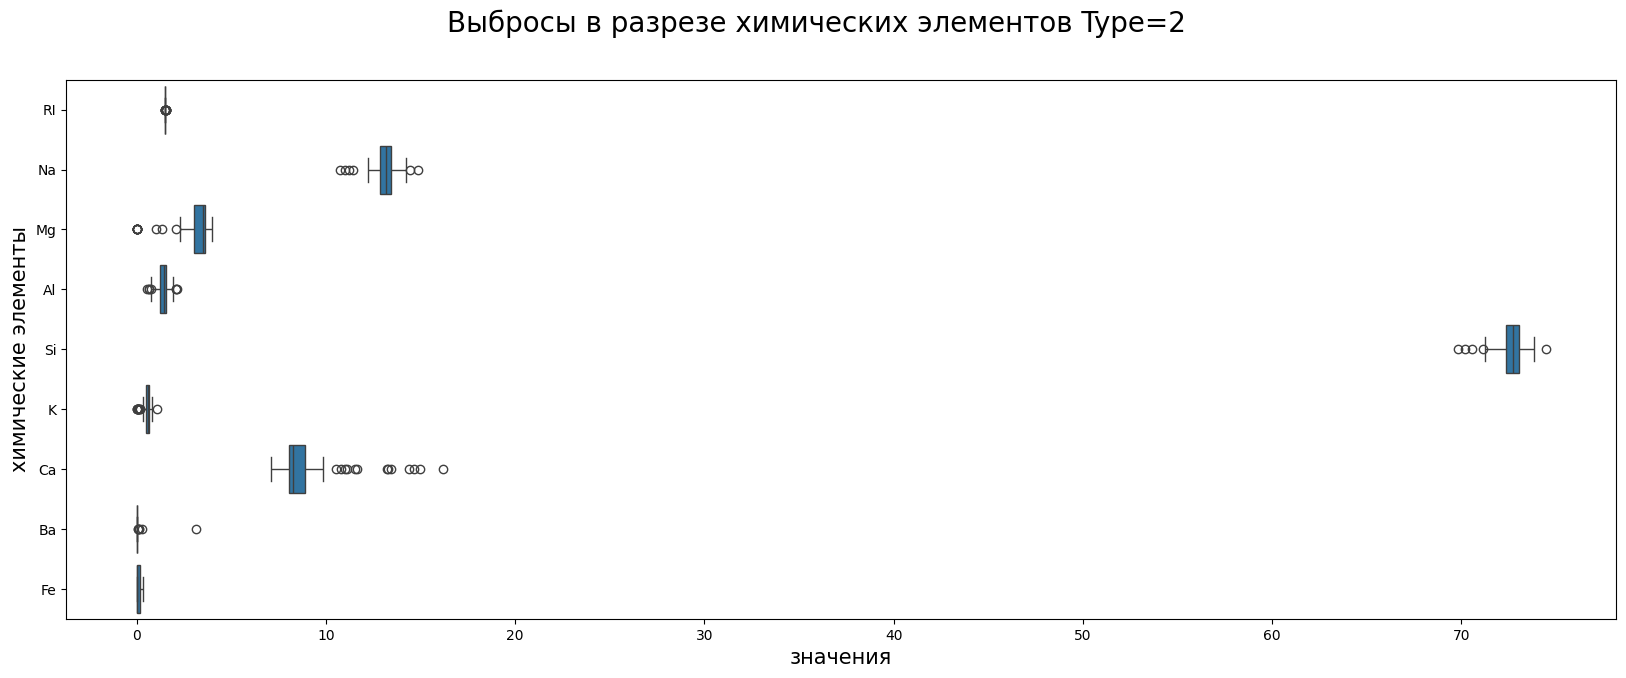

In [232]:
# Type=2
df_2 = df[df[target] == 2]
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_2.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов Type=2', fontsize=20)
plt.show()

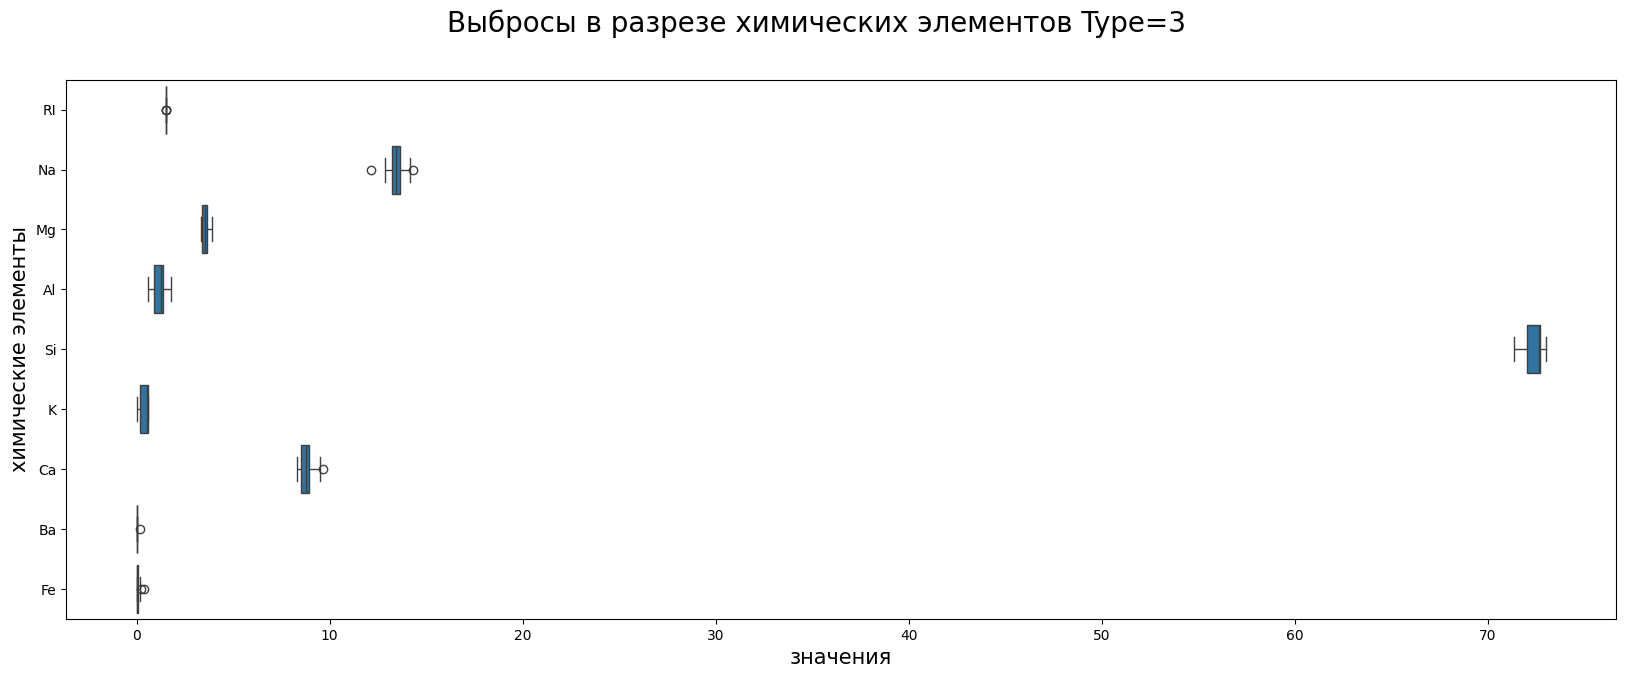

In [233]:
# Type=3
df_3 = df[df[target] == 3]
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_3.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов Type=3', fontsize=20)
plt.show()

In [ ]:
# Type=4 - отсутствует

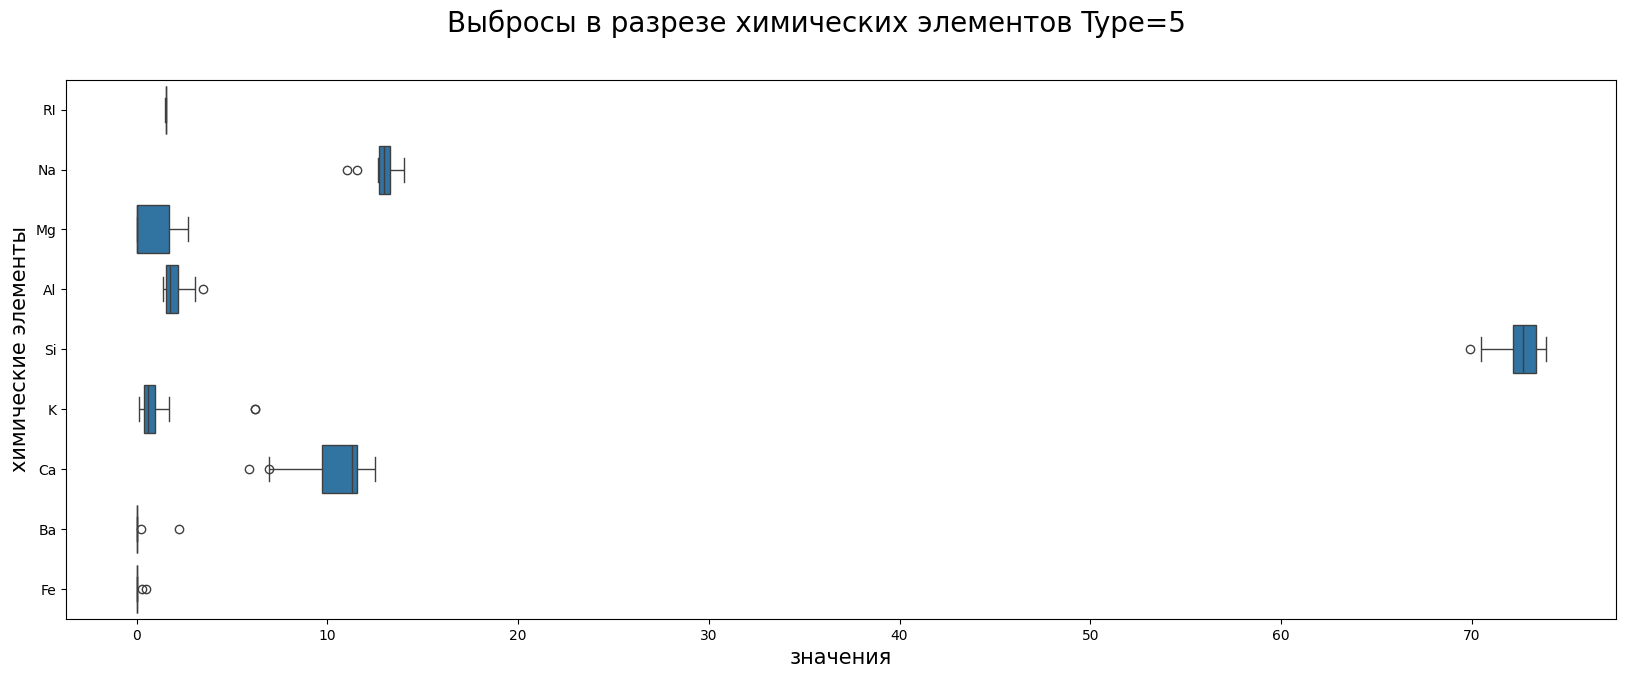

In [234]:
# Type=5
df_5 = df[df[target] == 5]
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_5.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов Type=5', fontsize=20)
plt.show()

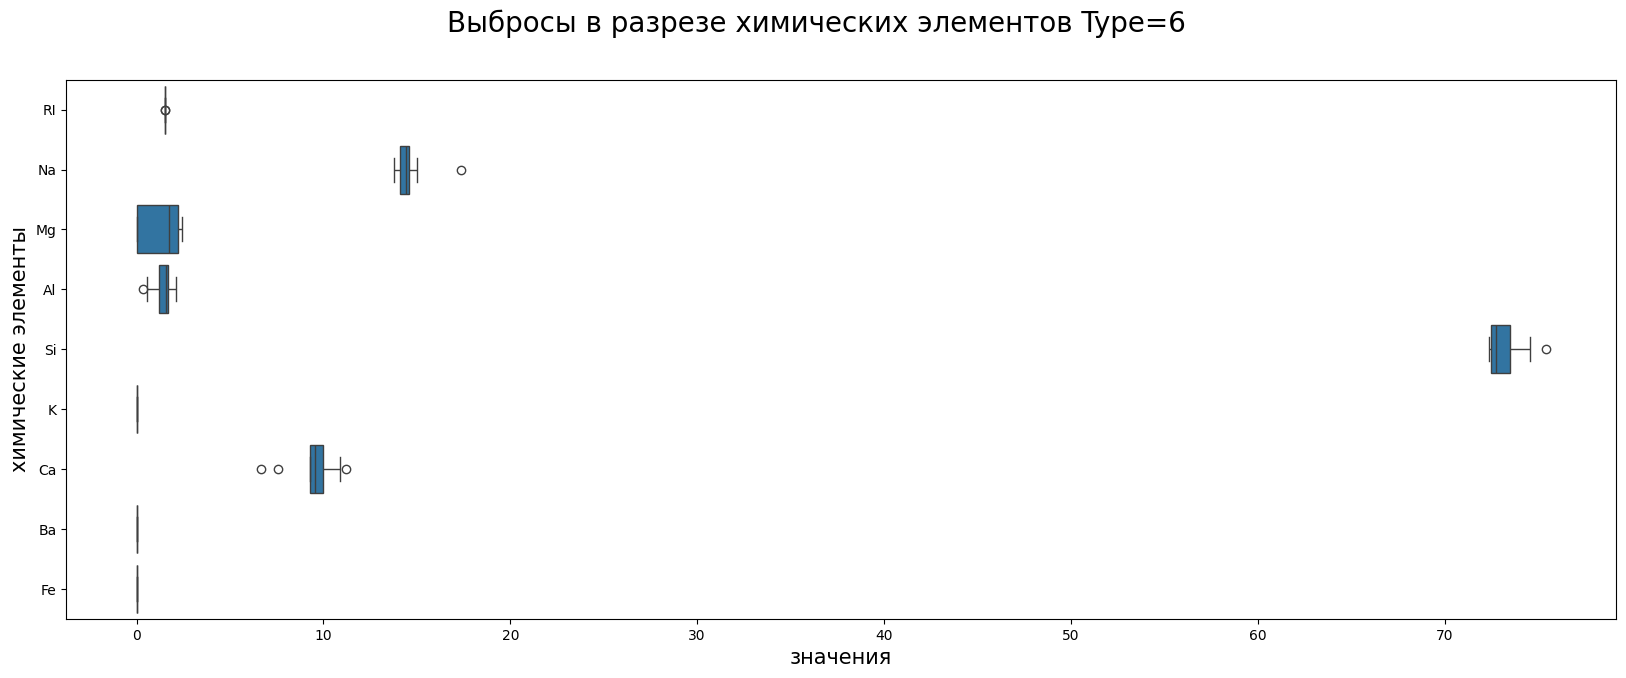

In [235]:
# Type=6
df_6 = df[df[target] == 6]
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_6.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов Type=6', fontsize=20)
plt.show()

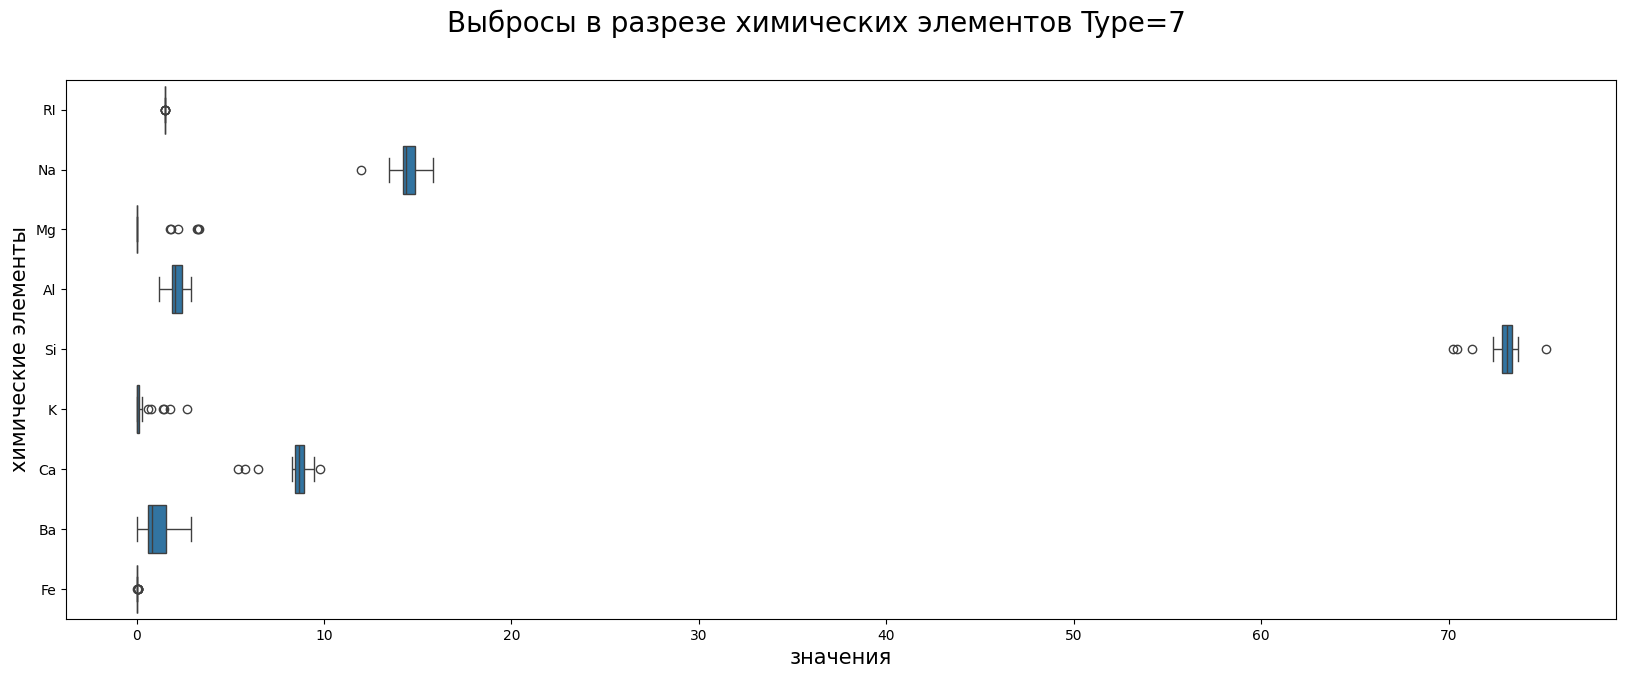

In [236]:
# Type=7
df_7 = df[df[target] == 7]
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_7.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов Type=7', fontsize=20)
plt.show()

Визуально видно, что самое большое количество выбросов у Type= 2 и 7

In [239]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Можно посмотреть выбросы элементов по Type

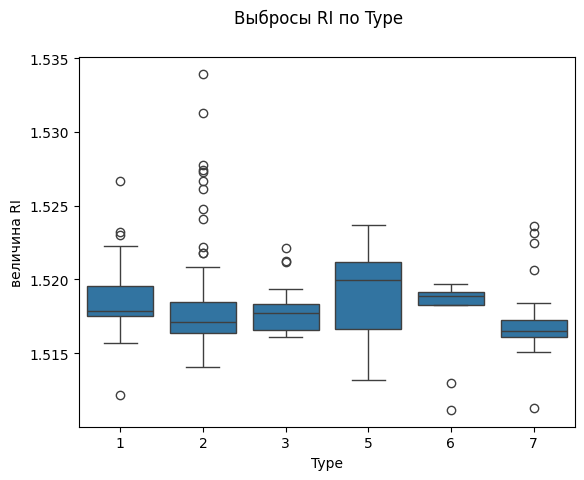

In [241]:
sns.boxplot(x='Type', y='RI', data=df)
plt.xlabel('Type')
plt.ylabel('величина RI')
plt.suptitle('Выбросы RI по Type')
plt.show()

In [ ]:
оценку плотности ядра

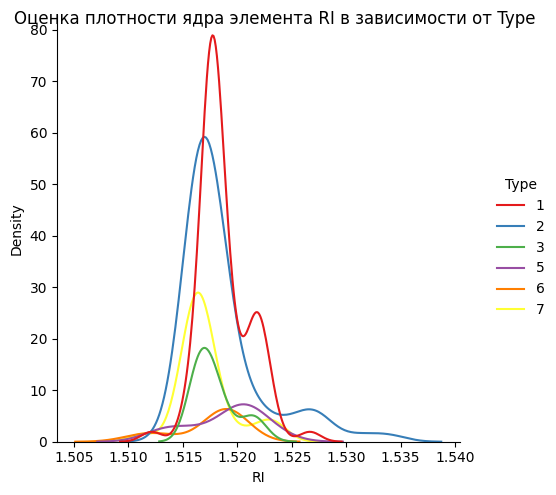

In [266]:
sns.displot(data=df, x='RI', hue='Type', kind='kde', palette = 'Set1')
plt.suptitle('Оценка плотности ядра элемента RI в зависимости от Type')
plt.show()

Выглядит все красиво, но на sns.boxplot все понятнее и конкретнее

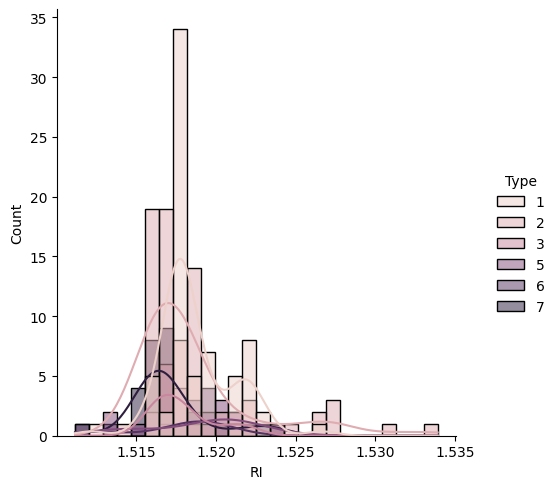

In [253]:
#sns.displot(data=df, x='RI', hue='Type', kde=True)

In [218]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [219]:
df_1 = df[df[target] == 1]
df_2 = df[df[target] == 2]
df_3 = df[df[target] == 3]
df_5 = df[df[target] == 5]
df_6 = df[df[target] == 6]
df_7 = df[df[target] == 7]

In [ ]:
sns.boxplot(data=df_1,
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 order=['RI', 'EUR', 'CAD', 'AUD', 'NZD'],
                 flierprops=dict(marker='o', markersize=4))

In [222]:
plt.figure(figsize=(20,7))
sns.boxplot(x='value',
            #y='variable',
            data=df_1,
            hue='Type'
           )
sns.boxplot(x='value',
            y='variable',
            data=pd.melt(df_2.drop(columns=target))
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов', fontsize=20)
plt.show()

ValueError: Could not interpret value `value` for `x`. An entry with this name does not appear in `data`.

<Figure size 2000x700 with 0 Axes>

In [194]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df.drop(columns=target),
            x='value', y='typy', order=['typy=1',
                                           'typy=2',
                                           'typy=3',
                                           'typy=4',
                                           'typy=5',
                                           'typy=6',
                                           'typy=7',
                                          ]
           )
plt.xlabel('значения', fontsize=15)
plt.ylabel('химические элементы', fontsize=15)
plt.suptitle('Выбросы в разрезе химических элементов', fontsize=20)
plt.show()

ValueError: Could not interpret value `value` for `x`. An entry with this name does not appear in `data`.

<Figure size 2000x700 with 0 Axes>

In [ ]:
# Generating two datasets
df_1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 15, 200)

# Creating a boxplot for both datasets
plt.boxplot([data1, data2], labels=['Data 1', 'Data 2'])

# Adding a title and labels
plt.title('Combined Boxplot of Two Datasets')
plt.ylabel('Values')

# Display the plot
plt.show()

In [ ]:
df.drop(columns=target),
                                                    df[target]

In [138]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
data = pd.get_dummies(data=df, columns=['RI', 'Na', 'Mg', 'Al', 'Si'],
                    prefix=['C', 'R', 'E', 'S'])
df.head()

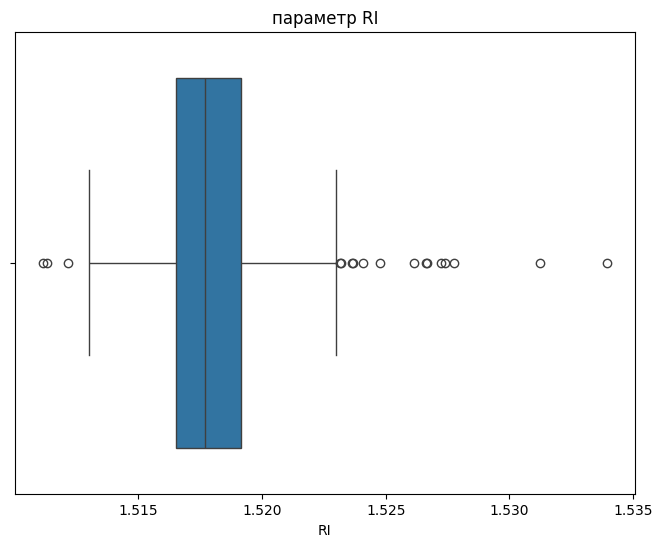

In [142]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['RI'])
plt.title('параметр RI')
plt.show()

б) исследование признаков на выбросы

 Обнаружение неконтролируемых выбросов с использованием локального коэффициента выбросов (LOF)

In [135]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=6)

clf.fit_predict(X_test)

array([ 1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1])

In [136]:
clf.negative_outlier_factor_

array([-1.0148831 , -1.0327388 , -1.20134132, -1.0396365 , -1.52681123,
       -1.99992944, -0.97190446, -1.02010398, -1.00502248, -1.06285089,
       -1.33217071, -1.5072029 , -0.95542527, -1.03216673, -1.56920717,
       -1.54046386, -2.02927639, -1.30614094, -1.2895526 , -2.89555375,
       -1.37693651, -0.97648413, -1.00556   , -0.9863058 , -0.96185917,
       -1.58057868, -0.97248194, -1.0539376 , -1.48194557, -0.98486951,
       -1.43863262, -1.04559839, -1.24956445, -0.97700435, -1.33932259,
       -0.9863058 , -5.69332666, -1.50502287, -1.35056902, -2.61547153,
       -1.44579097, -0.97648413, -1.17664329])

In [137]:
outliers = df[lof.negative_outlier_factor_ < lof.offset_]
valid_samples = df[lof.negative_outlier_factor_ >= lof.offset_]


NameError: name 'lof' is not defined